In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Q1

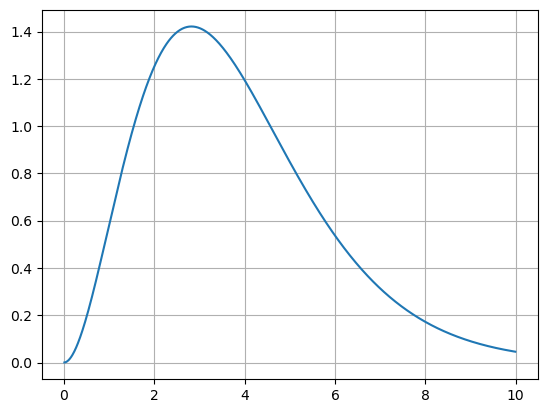

In [32]:
def f(x):
    return x**3/(np.exp(x)-1.0)

xs = np.arange(0.01, 10.0, 0.01)
ys = f(xs)
plt.plot(xs, ys)
plt.grid()

In [33]:

def w(x):
    return 1/(1+(x-2.5)**2)/np.arctan(4/19)

def get_x(y): 
    return 2.5 + np.tan(y*np.arctan(4/19))

def MC_eval_f(n):
    store = 0.0
    for i in range(n):
        x = np.random.rand()
        store += f(x)
    return store/n

def MC_eval_g(n):
    store = 0.0
    for i in range(n):
        y = np.random.rand()
        x = get_x(y)
        store += f(x)/w(x)
    return store/n

In [34]:
Ns = np.concatenate((np.asarray([1,2,5])*10, np.asarray([1,2,5])*100))

np.random.seed(20)

for n in Ns:
    value = MC_eval_f(n)
    value2 = MC_eval_g(n)
    print('%5d %10.7f %10.7f %10.7f'%(n, value, value2, abs(value-value2)))


   10  0.2671108  0.2965519  0.0294411
   20  0.2322436  0.2970655  0.0648218
   50  0.2163787  0.2978554  0.0814766
  100  0.2680021  0.2968704  0.0288683
  200  0.2203472  0.2966287  0.0762815
  500  0.2075229  0.2968991  0.0893762


### Q2

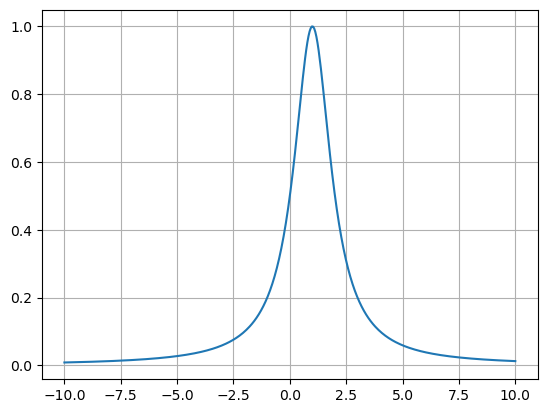

In [35]:
def w(x):
    return 1/(1+(x-1)**2)
    
xs = np.linspace(-10, 10.0, num=400)
ys = [w(x) for x in xs]

ys = ys/np.max(ys)
plt.plot(xs, ys);
plt.grid()

In [36]:
# Simulate

x0 = 1.0
N = 1000000
stepsize = 0.5

store = np.zeros(N)
for i in range(N):
    store[i] = x0
    x1 = x0 + stepsize*(np.random.rand()-0.5)
    r = w(x1)/w(x0)
    if r>1:
        x0 = x1
    else:
        p = np.random.rand()
        if p <= r:
            x0 = x1

(-20.0, 20.0)

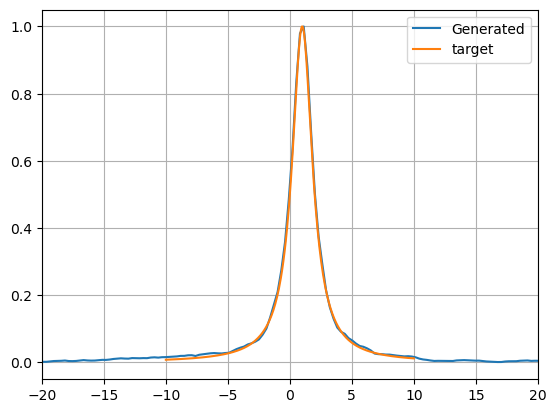

In [45]:
values, edges = np.histogram(store,200)
midpoints = [(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)]

values = values/np.max(values)
plt.plot(midpoints, values,label='Generated')
plt.plot(xs, ys,label='target')
plt.grid()
plt.legend()
plt.xlim([-20,20])